In [1]:
# import required packages 
using DataFrames
using FreqTables
using Plots, StatPlots
using DecisionTree
using StatsModels
using MLDataUtils

#Set the backend as matplotlib.pyplot
pyplot()

Plots.PyPlotBackend()

.Nullable{S}, Base.Nullable{T}) in module Base at nullable.jl:238 overwritten in module NullableArrays at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\NullableArrays\src\operators.jl:99.


In [2]:
# Read Dataset
data = readtable("C:/Users/veer/Desktop/Projects/Julia_In_Banking/Data/fraud_full_sample.csv")

,isFraud,_type,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1,No,CASH_OUT,1,95636.49,0.0,0.0,359141.7,1.36336851e6
2,Yes,TRANSFER,1,181.0,181.0,0.0,0.0,0.0
3,Yes,CASH_OUT,1,181.0,181.0,0.0,21182.0,0.0
4,Yes,TRANSFER,1,2806.0,2806.0,0.0,0.0,0.0
5,Yes,CASH_OUT,1,2806.0,2806.0,0.0,26202.0,0.0
6,Yes,TRANSFER,1,20128.0,20128.0,0.0,0.0,0.0
7,Yes,CASH_OUT,1,20128.0,20128.0,0.0,6268.0,12145.85
8,Yes,CASH_OUT,1,416001.33,0.0,0.0,102.0,9.29161962e6
9,Yes,TRANSFER,1,1.27721277e6,1.27721277e6,0.0,0.0,0.0
10,Yes,CASH_OUT,1,1.27721277e6,1.27721277e6,0.0,0.0,2.44498519e6


In [3]:
# Create 02 categories (numeric) for loan status
data[:fraud_status] = ifelse.(data[:isFraud] .== "Yes",1,0)
delete!(data,:isFraud)

,_type,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,fraud_status
1,CASH_OUT,1,95636.49,0.0,0.0,359141.7,1.36336851e6,0
2,TRANSFER,1,181.0,181.0,0.0,0.0,0.0,1
3,CASH_OUT,1,181.0,181.0,0.0,21182.0,0.0,1
4,TRANSFER,1,2806.0,2806.0,0.0,0.0,0.0,1
5,CASH_OUT,1,2806.0,2806.0,0.0,26202.0,0.0,1
6,TRANSFER,1,20128.0,20128.0,0.0,0.0,0.0,1
7,CASH_OUT,1,20128.0,20128.0,0.0,6268.0,12145.85,1
8,CASH_OUT,1,416001.33,0.0,0.0,102.0,9.29161962e6,1
9,TRANSFER,1,1.27721277e6,1.27721277e6,0.0,0.0,0.0,1
10,CASH_OUT,1,1.27721277e6,1.27721277e6,0.0,0.0,2.44498519e6,1


In [4]:
rename!(data, :fraud_status, :isFraud)

,_type,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1,CASH_OUT,1,95636.49,0.0,0.0,359141.7,1.36336851e6,0
2,TRANSFER,1,181.0,181.0,0.0,0.0,0.0,1
3,CASH_OUT,1,181.0,181.0,0.0,21182.0,0.0,1
4,TRANSFER,1,2806.0,2806.0,0.0,0.0,0.0,1
5,CASH_OUT,1,2806.0,2806.0,0.0,26202.0,0.0,1
6,TRANSFER,1,20128.0,20128.0,0.0,0.0,0.0,1
7,CASH_OUT,1,20128.0,20128.0,0.0,6268.0,12145.85,1
8,CASH_OUT,1,416001.33,0.0,0.0,102.0,9.29161962e6,1
9,TRANSFER,1,1.27721277e6,1.27721277e6,0.0,0.0,0.0,1
10,CASH_OUT,1,1.27721277e6,1.27721277e6,0.0,0.0,2.44498519e6,1


In [5]:
# Explore Loan Amount
freqtable(data[:isFraud])

2-element Named Array{Int64,1}
Dim1  │ 
──────┼─────
0     │ 8213
1     │ 8213

In [6]:
describe(data[:amount])

Summary Stats:
Mean:           884267.745135
Minimum:        0.000000
1st Quartile:   96961.040000
Median:         234740.010000
3rd Quartile:   635409.320000
Maximum:        10000000.000000
Length:         16426
Type:           Float64
Number Missing: 0
% Missing:      0.000000


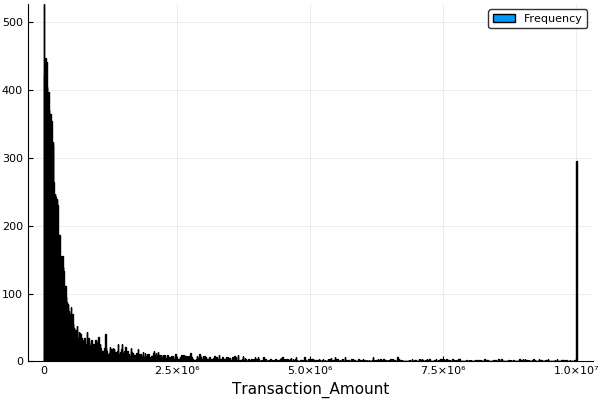

In [7]:
# Plot Histogram for Applicant Income
Plots.histogram(data[:amount], bins = 1000, xlabel = "Transaction_Amount", labels = "Frequency")

In [8]:
eltypes(data)

8-element Array{Type,1}:
 String 
 Int64  
 Float64
 Float64
 Float64
 Float64
 Float64
 Int64  

In [9]:
freqtable(data[:_type])

2-element Named Array{Int64,1}
Dim1     │ 
─────────┼──────
CASH_OUT │ 10759
TRANSFER │  5667

In [22]:
# Label Encoding-- Transaction Type
data[:CASH_OUT] = ifelse.(data[:_type] .== "CASH_OUT",1,0) # The value 0 is for Transfer type transaction
delete!(data,:_type)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT
1,1,95636.49,0.0,0.0,359141.7,1.36336851e6,0,1
2,1,181.0,181.0,0.0,0.0,0.0,1,0
3,1,181.0,181.0,0.0,21182.0,0.0,1,1
4,1,2806.0,2806.0,0.0,0.0,0.0,1,0
5,1,2806.0,2806.0,0.0,26202.0,0.0,1,1
6,1,20128.0,20128.0,0.0,0.0,0.0,1,0
7,1,20128.0,20128.0,0.0,6268.0,12145.85,1,1
8,1,416001.33,0.0,0.0,102.0,9.29161962e6,1,1
9,1,1.27721277e6,1.27721277e6,0.0,0.0,0.0,1,0
10,1,1.27721277e6,1.27721277e6,0.0,0.0,2.44498519e6,1,1


In [23]:
# Partition Data into Train and Test datasets
function partitionTrainTest(data, at = 0.7)
    n = nrow(data)
    idx = shuffle(1:n)
    train_idx = view(idx, 1:floor(Int, at*n))
    test_idx = view(idx, (floor(Int, at*n)+1):n)
    data[train_idx,:], data[test_idx,:]
end

train,test = partitionTrainTest(data, 0.7) # 70% train

(11498×8 DataFrames.DataFrame
│ Row   │ step │ amount    │ oldbalanceOrg │ newbalanceOrig │ oldbalanceDest │
├───────┼──────┼───────────┼───────────────┼────────────────┼────────────────┤
│ 1     │ 35   │ 3.60694e6 │ 3.60694e6     │ 0.0            │ 0.0            │
│ 2     │ 260  │ 67547.3   │ 0.0           │ 0.0            │ 4.30923e5      │
│ 3     │ 329  │ 1.74977e5 │ 49822.0       │ 0.0            │ 0.0            │
│ 4     │ 133  │ 4.58179e5 │ 104236.0      │ 0.0            │ 0.0            │
│ 5     │ 642  │ 330665.0  │ 330665.0      │ 0.0            │ 7.51482e5      │
│ 6     │ 275  │ 2.71502e5 │ 0.0           │ 0.0            │ 4.75124e6      │
│ 7     │ 636  │ 89657.4   │ 89657.4       │ 0.0            │ 0.0            │
│ 8     │ 332  │ 942572.0  │ 21784.0       │ 0.0            │ 0.0            │
│ 9     │ 14   │ 1.56189e6 │ 1.56189e6     │ 0.0            │ 3.47193e6      │
│ 10    │ 248  │ 1.0e7     │ 1.40113e7     │ 4.01131e6      │ 0.0            │
│ 11    │ 357  │ 2.358

In [24]:
# Missing value imputation
showcols(train)
# There is no missing value, therefore this step is not required

11498×8 DataFrames.DataFrame
│ Col # │ Name           │ Eltype  │ Missing │
├───────┼────────────────┼─────────┼─────────┤
│ 1     │ step           │ Int64   │ 0       │
│ 2     │ amount         │ Float64 │ 0       │
│ 3     │ oldbalanceOrg  │ Float64 │ 0       │
│ 4     │ newbalanceOrig │ Float64 │ 0       │
│ 5     │ oldbalanceDest │ Float64 │ 0       │
│ 6     │ newbalanceDest │ Float64 │ 0       │
│ 7     │ isFraud        │ Int64   │ 0       │
│ 8     │ CASH_OUT       │ Int64   │ 0       │

In [25]:
y_train = train[:,:isFraud]
X_train = train[:,[1,2,3,4,5,6,8]]
y_test = test[:,:isFraud]
X_test = test[:,[1,2,3,4,5,6,8]]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT
1,223,334890.91,334890.91,0.0,0.0,0.0,0
2,631,3.12069098e6,3.12069098e6,0.0,3.8814446e6,7.00213558e6,1
3,470,864994.24,864994.24,0.0,0.0,0.0,0
4,640,46973.96,46973.96,0.0,0.0,46973.96,1
5,182,211674.08,21652.0,0.0,769329.27,981003.35,0
6,156,509599.19,0.0,0.0,4.20060973e6,4.71020892e6,1
7,737,1.28111384e6,1.28111384e6,0.0,0.0,0.0,0
8,236,2238.01,3414.6,1176.59,1.28848627e6,1.29072428e6,1
9,279,145982.36,145982.36,0.0,0.0,0.0,0
10,348,130597.03,13000.0,0.0,0.0,130597.03,1


In [26]:
# Convert all the datasets in to arrays
# Convert data types for all the columns in training dataset to float type
for c = eachcol(X_train)
  if eltype(c[2]) <: Integer
    X_train[c[1]] = X_train[c[1]] .* 1.0
  end
end

for c = eachcol(X_test)
  if eltype(c[2]) <: Integer
    X_test[c[1]] = X_test[c[1]] .* 1.0
  end
end

X_train1 = convert(Array, X_train)
X_test1 = convert(Array, X_test)
y_train1 = convert(Array, y_train)
y_test1 = convert(Array, y_test)

4928-element Array{Int64,1}:
 1
 1
 1
 1
 0
 0
 1
 0
 1
 0
 0
 1
 1
 ⋮
 1
 1
 0
 0
 1
 0
 1
 1
 0
 0
 1
 1

In [27]:
# Build a standard scaler
type StandardScalar
    mean::Vector{Float64}
    std::Vector{Float64}
end

# Helper function to initialize an empty scalar
function StandardScalar()
    StandardScalar(Array(Float64,0),Array(Float64,0))
end

# Compute mean and standard deviation of each column
function fit_std_scalar!(std_scalar::StandardScalar,X::Matrix{Float64})
    n_rows, n_cols = size(X)
    std_scalar.std = zeros(n_cols)
    std_scalar.mean = zeros(n_cols)
    # for loops are fast again!
    for i = 1:n_cols
        std_scalar.mean[i] = mean(X[:,i])
        std_scalar.std[i] = std(X[:,i])
    end
end

function transform(std_scalar::StandardScalar,X::Matrix{Float64})
    (X .- std_scalar.mean') ./ std_scalar.std' # broadcasting
end

# fit and transform in one function
function fit_transform!(std_scalar::StandardScalar,X::Matrix{Float64})
    fit_std_scalar!(std_scalar,X)
    transform(std_scalar,X)
end

fit_transform! (generic function with 1 method)

In [28]:
# Perform Standard Scaling for all X variables
std_scalar = StandardScalar()

X_train1 = fit_transform!(std_scalar,X_train1)
X_test1 = transform(std_scalar,X_test1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at .\deprecated.jl:70
 [2] Array(::Type{Float64}, ::Int64) at .\deprecated.jl:57
 [3] StandardScalar() at .\In[27]:9
 [4] include_string(::String, ::String) at .\loading.jl:522
 [5] include_string(::Module, ::String, ::String) at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:71
 [6] execute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\execute_request.jl:158
 [7] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at C:\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\Compat\src\Compat.jl:385
 [8] eventloop(::ZMQ.Socket) at C:\JuliaPro-0.6.2.2\pkgs-0.6.2.2\v0.6\IJulia\src\eventloop.jl:8
 [9] (::IJulia.##14#17)() at .\task.jl:335
while loading In[28], in expression starting on line 2


4928×7 Array{Float64,2}:
 -0.410819    -0.292168     -0.191709    …  -0.294814   -0.399961   -1.39437 
  1.70195      1.24723       0.943131        0.725798    1.29428     0.717109
  0.868236     0.000760173   0.0242371      -0.294814   -0.399961   -1.39437 
  1.74856     -0.451267     -0.308997       -0.294814   -0.388595    0.717109
 -0.623132    -0.360256     -0.319312       -0.0925213  -0.162596   -1.39437 
 -0.757769    -0.195627     -0.328132    …   0.809721    0.739726    0.717109
  2.25086      0.230702      0.19375        -0.294814   -0.399961   -1.39437 
 -0.3435      -0.475988     -0.326741        0.0439891  -0.0876559   0.717109
 -0.120831    -0.396556     -0.268664       -0.294814   -0.399961   -1.39437 
  0.236476    -0.405058     -0.322836       -0.294814   -0.368362    0.717109
  0.640388    -0.306968     -0.315779    …   1.72797     1.53594     0.717109
 -0.239933    -0.438158     -0.299333       -0.294814   -0.399961   -1.39437 
  2.21979     -0.432091     -0.29486   

In [29]:
labels= y_train1
features= X_train1

11498×7 Array{Float64,2}:
 -1.38435    1.51593     1.14121    …  -0.294814   -0.399961   -1.39437 
 -0.21922   -0.439899   -0.328132      -0.181504   -0.279351    0.717109
  0.138087  -0.380534   -0.307836      -0.294814   -0.357623    0.717109
 -0.876872  -0.22404    -0.28567       -0.294814   -0.289099    0.717109
  1.75891   -0.294503   -0.193431      -0.0972142  -0.138123    0.717109
 -0.141544  -0.327196   -0.328132   …   0.954506    0.815346   -1.39437 
  1.72784   -0.427681   -0.291609      -0.294814   -0.399961   -1.39437 
  0.153622   0.0436287  -0.319258      -0.294814   -0.171895   -1.39437 
 -1.4931     0.385857    0.308129       0.618117    1.15904     0.717109
 -0.28136    5.04865     5.3796        -0.294814   -0.399961   -1.39437 
  0.283081  -0.346918   -0.328132   …  -0.049275   -0.116961    0.717109
  0.712885   5.04865     4.5248        -0.294814   -0.399961   -1.39437 
  0.899306  -0.47255    -0.328132      -0.265043   -0.370519   -1.39437 
  ⋮                      

In [39]:
# train random forest classifier
# using 2 random features, 10 trees, 0.5 portion of samples per tree (optional), and a maximum tree depth of 6 (optional)
model = build_forest(labels, features, 2, 100, 0.5, 10)

Ensemble of Decision Trees
Trees:      100
Avg Leaves: 89.73
Avg Depth:  10.0

In [40]:
# test on the Test dataset
y_pred1 = apply_forest(model, X_test1)

4928-element Array{Any,1}:
 1
 1
 1
 1
 0
 0
 1
 0
 1
 0
 0
 1
 1
 ⋮
 1
 1
 0
 0
 1
 0
 1
 1
 0
 0
 1
 1

In [41]:
freqtable(y_test1,y_pred1)

2×2 Named Array{Int64,2}
Dim1 ╲ Dim2 │    0     1
────────────┼───────────
0           │ 2337    47
1           │   76  2468

In [42]:
accuracy = (2337 + 2468)/length(y_test1)

0.9750405844155844

In [ ]:
using RCall

In [ ]:
saveRDS("C:/Users/veer/Desktop/Projects/Credit_Risk_Modeling/inal/JuliaModelCreditLog.rds",model)